<h1>The Stroop Effect Study</h1>
<h2>Introduction</h2>
<p>The data of the study comes from the Stroop task, where participants were asked to report aloud the color 
of the text presented to me. The scenarios could be "congruent" when the word is same as its printed color, or "incongruent" when the word is a different color.  </p> 
<b><i> The null hypothesis is that people would spend same time on reporting the incongruent group and congruent group on average. The alternative hypothsis is that people would spend more time on the incongruent group on average.</i></b>

<img src="./image/stroop_effect.png" width=700 height=700/>
    
<h2>Data Overview</h2>  
<p>In the study, we control for the font and the size of the print, while take note of how much time people need to name the ink colors. The independent variable is the type of words participants saw and the dependent variable is the time in seconds people need to report the color. </p>
<p> There are 24 participants in total. The average reaction time to congruent prints was 14 (stdv: 3.6) seconds and 22 (stdv: 4.8) seconds for the incongruent group.

In [29]:
import pandas as pd
prj= pd.read_csv("./data/stroopdata.csv")
prj.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


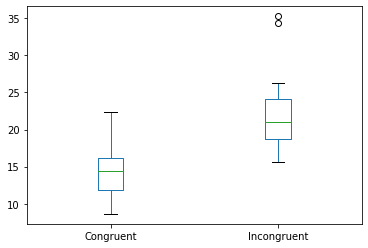

In [30]:
import matplotlib.pyplot as plt
prj.plot.box()

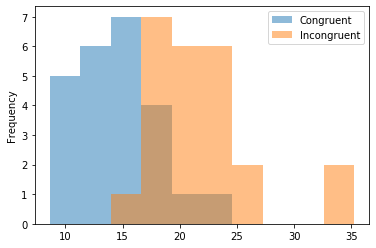

In [31]:
prj.plot.hist(alpha=0.5)

## Data analysis
The box plot shows the distributions of two groups of data and it does not appear to be normally distributed. A Shapirao-Wilk test was given to examine the normality of the distribution. Since the incongruent group does not have a normal distribution given the test, I used wilcoxon-signed rank test to test my hypothesis. A paired-test is also used to compare the results. A 95% confidence interval and 5% type-I error is used. 

In [34]:
from scipy import stats
stats.shapiro(prj['Congruent'])

(0.970922589302063, 0.689803421497345)

In [35]:
stats.shapiro(prj['Incongruent'])

(0.85394686460495, 0.0025900385808199644)

In [40]:
prj['diff'] = prj['Incongruent'] -  prj['Congruent'] 
prj.head()

,Congruent,Incongruent,diff
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134


In [41]:
# Wilcoxon Signed-ranked Test 

from scipy.stats import wilcoxon
w,p = wilcoxon(prj['diff'],alternative='greater')
w,p

(300.0, 9.107648574484005e-06)

In [25]:
stats.ttest_rel(prj['Incongruent'], prj['Congruent'])

Ttest_relResult(statistic=8.020706944109957, pvalue=4.103000585711178e-08)

## Interpretations
Both tests confirm that the averate reporting time for the incongruent group is longer thant that for the congruent group. The Wilcoxon rank statistics is 300.0 with a p-value of 9.1e-06; the paired t-test results in a statistics of 8.0 and p-value of 4.1e-08. Both p-values are statistically siginificant with the assumed 95% CI. Therefore, I have sufficient evidence to reject the null hypothesis and conclude that the averate reporting time for the incongruent group is longer thant that for the congruent group. 